In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
((xtrain,ytrain),(xtest,ytest))=keras.datasets.cifar10.load_data()
xval=xtest[0:4000]
yval=ytest[0:4000]
xtest=xtest[4000:]
ytest=ytest[4000:]

In [3]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((50000, 32, 32, 3),
 (50000, 1),
 (6000, 32, 32, 3),
 (6000, 1),
 (4000, 32, 32, 3),
 (4000, 1))

In [4]:
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)
yval=keras.utils.to_categorical(yval)

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
# model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
history=model.fit(xtrain,ytrain,batch_size=500,epochs=10,verbose=1,validation_data=(xval,yval))

Epoch 1/10
  6/100 [>.............................] - ETA: 6:21 - loss: 12.0815 - accuracy: 0.1013

KeyboardInterrupt: 

In [84]:
model.evaluate(xtest,ytest)

188/188 [==============================] - 5s 16ms/step - loss: 1.9690 - accuracy: 0.6852


[1.9690333604812622, 0.6851666569709778]

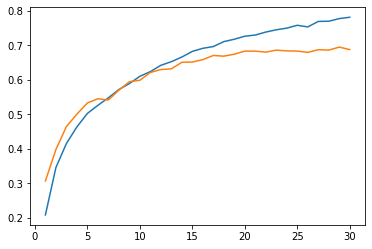

In [86]:
plt.plot(range(1,31),history.history['accuracy'])
plt.plot(range(1,31),history.history['val_accuracy'])

In [ ]:
def visualize_conv_layer(layer_name)
    layer_output=model.get_layer(layer_name).output  #get the Output of the Layer

    intermediate_model=keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about

    intermediate_prediction=intermediate_model.predict(x_train[4].reshape(1,32,32,3)) #predicting in the Intermediate Node
  
    row_size=4
    col_size=8
  
    img_index=0

    print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#
  
    fig,ax=plt.subplots(row_size,col_size,figsize=(10,8)) 

    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

            img_index=img_index+1 #Increment the Index number of img_index variable
        
print("Function to Visualize the Output has been Created")